In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import networkx as nx
import igraph as ig
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import json

In [14]:
from util.similarities_util import *
from util.load_data_util import *
from util.metrics_util import *
from util.clustering_util import Louvain, Spectral

In [7]:
f = open('data_path.json')
data = json.load(f)
data_path = data['data_path']

In [8]:
G = loadData_networkX(data_path)

networkX Graph loaded.


In [9]:
g = loadData_iGraph(data_path)

iGraph Graph loaded.


Negative sub-networks

In [10]:
negativeG = load_subnetwork_networkX(data_path, True)

networkX Sub-Graph loaded.


In [11]:
negativeg = load_subnetwork_iGraph(data_path, True)

iGraph Sub-Graph loaded.


# Similarity

In [15]:
jaccard_sigma = jaccard_sim(g)

# Community Detection

## Louvain method

In [17]:
L = Louvain(jaccard_sigma)
clusters, modularity = L.run()

In [ ]:
print(len(clusters))

## Spectural Clustering

In [ ]:
def spectralClustering(sim_matrix):
  sc = SpectralClustering(7, affinity='precomputed', n_init=100, assign_labels='discretize')
  sc.fit(sim_matrix)
  return sc
# Compare ground-truth and clustering-results
# print('spectral clustering')
# print(sc.labels_)
# print('just for better-visualization: invert clusters (permutation)')
# print(np.abs(sc.labels_ - 1))

# # Calculate some clustering metrics
# print(metrics.adjusted_rand_score(gt, sc.labels_))
# print(metrics.adjusted_mutual_info_score(gt, sc.labels_))

# Visualizations

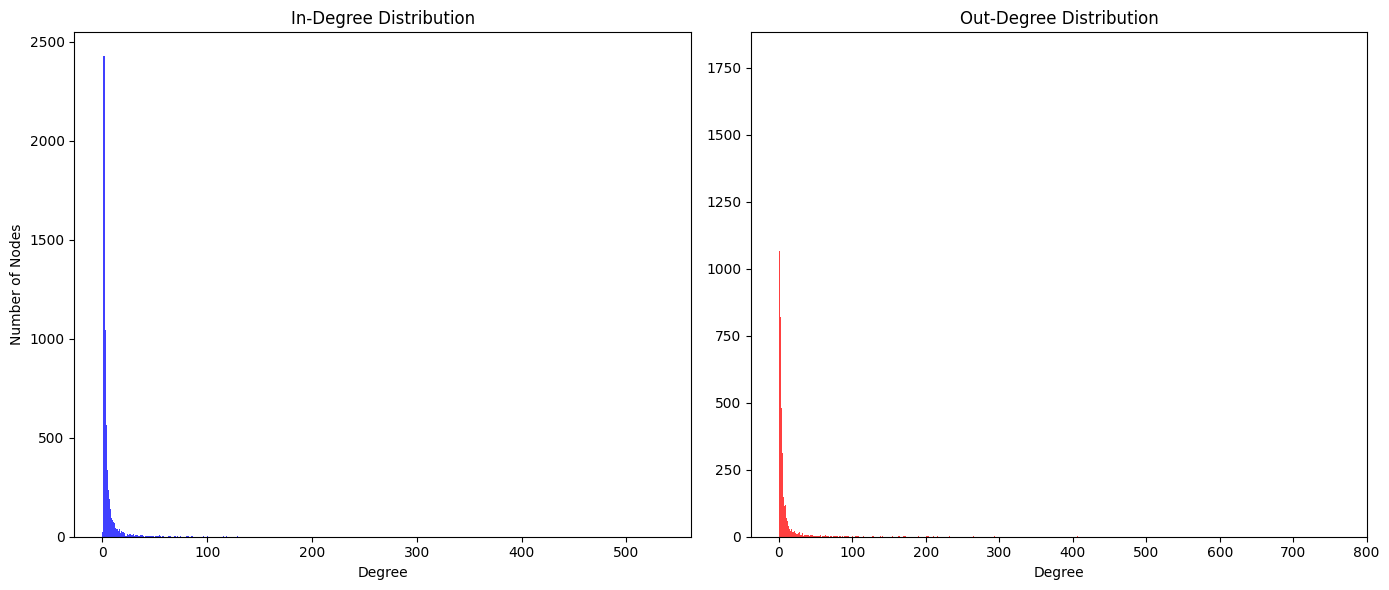

In [ ]:
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.hist(in_degrees, bins=range(min(in_degrees), max(in_degrees) + 1), alpha=0.75, color='blue')
plt.title('In-Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')

plt.subplot(122)
plt.hist(out_degrees, bins=range(min(out_degrees), max(out_degrees) + 1), alpha=0.75, color='red')
plt.title('Out-Degree Distribution')
plt.xlabel('Degree')

plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))

# pos = nx.spring_layout(G)
# nx.draw_networkx_nodes(G, pos, node_color='cyan', node_size=5, alpha=0.1)
# nx.draw_networkx_edges(G, pos, width=2.0, alpha=1)

# nx.draw_networkx(G,node_color = 'cyan')
# plt.show()
